In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('results.csv')
df.head()

,N,f,timeToElection,alpha,timeSpentInNanoSeconds
0,4,1,500,0.0,3348959
1,4,1,500,0.0,883684
2,4,1,500,0.0,1226987
3,4,1,500,0.0,853336
4,4,1,500,0.0,1159676


In [19]:
df_mean = df.pivot_table(index='N', columns='timeToElection', values='timeSpentInNanoSeconds', aggfunc='mean')
df_mean.head()

timeToElection,500,1000,1500,2000
N,,,,
4,6.107253e+05,390879.4,1.442667e+05,3.301450e+05
10,6.153309e+05,273949.4,3.130172e+05,1.685658e+06
100,4.093441e+08,870132427.6,1.479742e+09,1.760076e+09


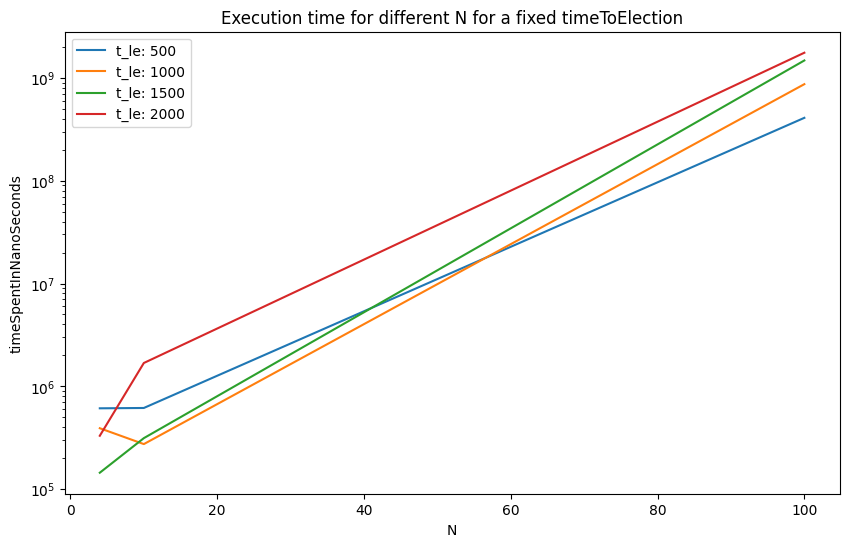

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_mean)
plt.xlabel('N')
plt.ylabel('timeSpentInNanoSeconds')
legend = ['t_le: ' + str(col) for col in df_mean.columns]
plt.legend(legend)
plt.title('Execution time for different N for a fixed timeToElection')

plt.yscale('log')  # Change the y-axis to a logarithmic scale
# plt.xscale('log')  # Change the x-axis to a logarithmic scale

plt.show()

In [32]:
df_mean = df.pivot_table(index='timeToElection', columns='N', values='timeSpentInNanoSeconds', aggfunc='mean')
df_mean.head()

N,4,10,100
timeToElection,,,
500,610725.333333,6.153309e+05,4.093441e+08
1000,390879.400000,2.739494e+05,8.701324e+08
1500,144266.666667,3.130172e+05,1.479742e+09
2000,330145.000000,1.685658e+06,1.760076e+09


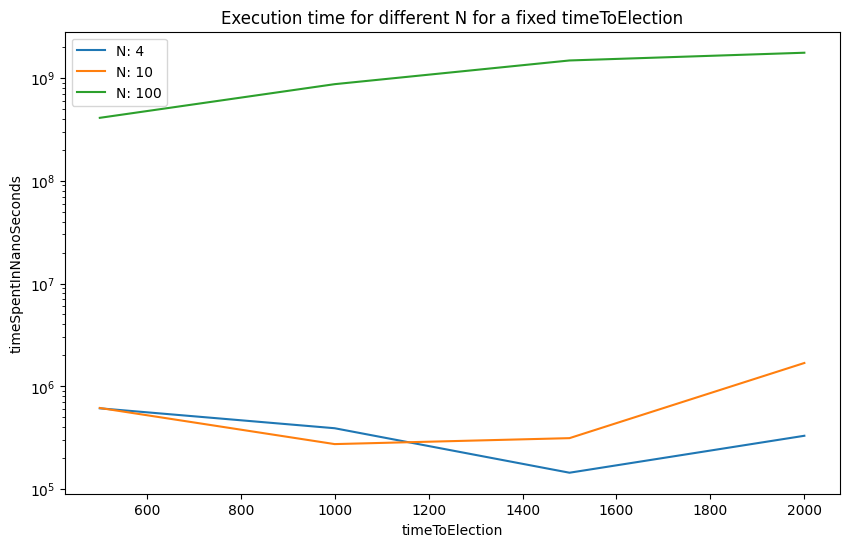

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df_mean)
plt.xlabel('timeToElection')
plt.ylabel('timeSpentInNanoSeconds')
legend = ['N: ' + str(col) for col in df_mean.columns]
plt.legend(legend)
plt.title('Execution time for different N for a fixed timeToElection')

plt.yscale('log')  # Change the y-axis to a logarithmic scale
# plt.xscale('log')  # Change the x-axis to a logarithmic scale

plt.show()

In [69]:
df_mean = df.groupby(['N', 'timeToElection', 'alpha']).mean().reset_index()
df_mean.drop(columns='f', inplace=True)
df_mean.head()


,N,timeToElection,alpha,timeSpentInNanoSeconds
0,4,500,0.0,1494528.4
1,4,500,0.1,229819.6
2,4,500,1.0,107828.0
3,4,1000,0.0,620034.2
4,4,1000,0.1,369870.4


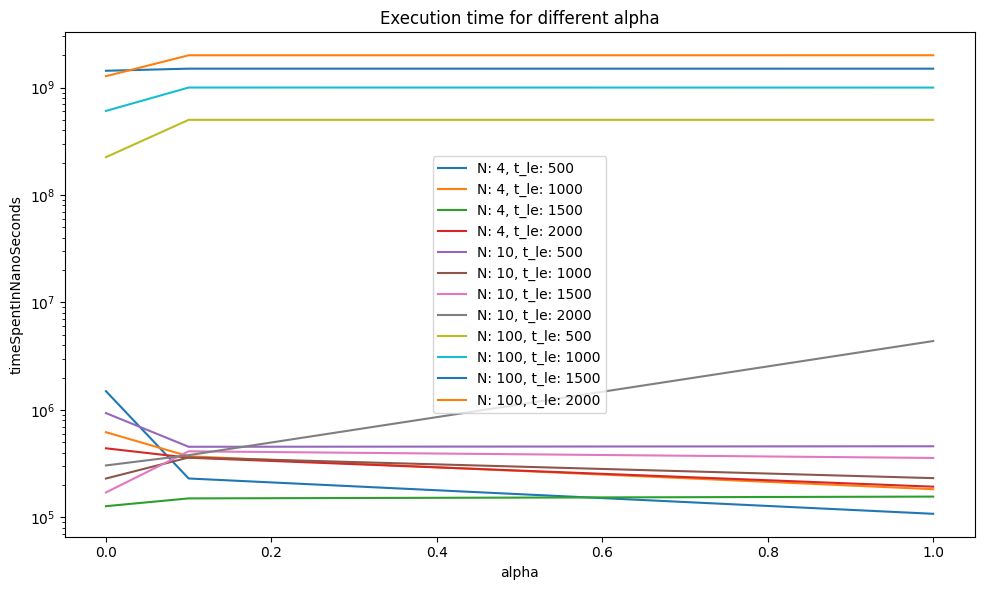

In [79]:
plt.figure(figsize=(10, 6))
for N in df_mean['N'].unique():
    for timeToElection in df_mean['timeToElection'].unique():
        df_temp = df_mean[(df_mean['N'] == N) & (df_mean['timeToElection'] == timeToElection)]
        plt.plot(df_temp['alpha'], df_temp['timeSpentInNanoSeconds'], label='N: ' + str(N) + ', t_le: ' + str(timeToElection))
plt.xlabel('alpha')
plt.ylabel('timeSpentInNanoSeconds')
plt.title('Execution time for different alpha')
plt.legend()
plt.tight_layout()
# plt.legend(['N: ' + str(N) + ', t_le: ' + str(timeToElection) for N, timeToElection in zip(df_mean['N'].unique(), df_mean['timeToElection'].unique())])


plt.yscale('log')  # Change the y-axis to a logarithmic scale

plt.show()
